In [27]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df = pd.read_csv('cardio_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,y
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
# Setup X and y variables
X = df.drop(columns='y')
y = df['y'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
X_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,49900.807543,19467.845905,1.349924,164.360876,74.188624,128.755467,96.033810,1.363810,1.224514,0.088552,0.054076,0.802495
std,28874.152506,2465.254653,0.476950,8.218277,14.415231,147.722445,172.183123,0.677611,0.569761,0.284099,0.226170,0.398120
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,24923.750000,17666.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,49946.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,74811.250000,21322.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,23692.000000,2.000000,207.000000,200.000000,16020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


# Missing Values

In [29]:
# Find the percentage of null values in each column
X_train.isna().sum()/len(X_train)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
dtype: float64

In [6]:
# Explore each column with missing values to determine the best fill strategy
# First the job column
X_train['smoke'].value_counts()

cardio
0    26257
1    26243
Name: count, dtype: int64

In [33]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
y                int64
dtype: object

In [30]:
# The job column is varied and the number of missing values is small
# It might suffice to fill the missing values with "unknown"
# We'll make a function to handle this.
def fill_job(X_data):
    X_data['smoke'] = X_data['smoke'].fillna('unknown')
    return X_data

In [31]:
# Education is next
X_train['active'].value_counts()

active
1    42131
0    10369
Name: count, dtype: int64

In [32]:
X_train.loc[X_train['active'].isna()].describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
X_train.loc[X_train['active'].isna(), 'cardio'].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
# The vast majority of rows missing an education value
# have a job which wouldn't require a higher education
# Lets fillna for education with 'primary', but 'unknown'
# might be a good choice as well

def fill_education(X_data):
    X_data['active'] = X_data['active'].fillna('primary')
    return X_data

In [12]:
# Now for the contact column
X_train['smoke'].value_counts()

smoke
0    47851
1     4649
Name: count, dtype: int64

In [13]:
X_train.loc[X_train['smoke'].isna()].describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
X_train.loc[X_train['cardio'].isna(), 'active'].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
X_train.loc[X_train['smoke'].isna(), 'cardio'].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
# This one is harder to find; we'll just fillna
# using 'unknown' for this one

def fill_contact(X_data):
    X_data['smoke'] = X_data['smoke'].fillna('unknown')
    return X_data


<Axes: ylabel='Frequency'>

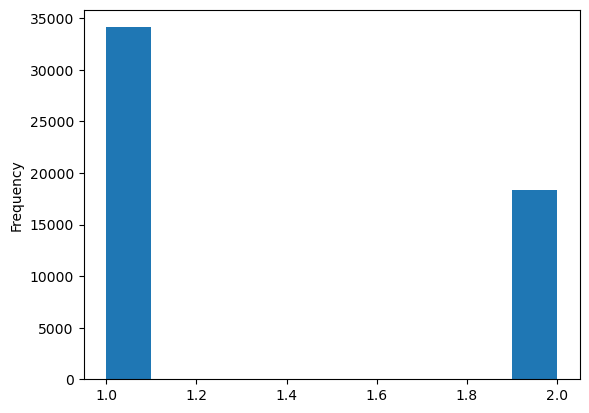

In [18]:
# Next is pdays
# This column says how many days it has been since the last 
# marketing contact for this client

X_train['gender'].plot(kind='hist')

In [19]:
X_train.loc[X_train['gender'].isna()].describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Hmm... previous has some interesting output, lets explore that
X_train.loc[X_train['gender'].isna(), 'previous'].value_counts()

KeyError: 'previous'

In [18]:
# According to the information about the dataset,
# a zero in the 'previous' column means that this client
# has not been contacted before! Lets put a -1 in place
# of the NaNs to indicate this importance to the model.

def fill_pdays(X_data):
    X_data['pdays'] = X_data['pdays'].fillna(-1)
    return X_data

In [19]:
# Lastly is poutcome

X_train['poutcome'].value_counts()

failure    2759
other      1048
success     845
Name: poutcome, dtype: int64

In [20]:
# The number of missing values in this column 
# closely matched that of pdays
# Lets check the 'previous' column

X_train.loc[X_train['poutcome'].isna(), 'previous'].value_counts()

0    20776
2        2
7        1
Name: previous, dtype: int64

In [21]:
# Since the vast majority of missing data didn't have a previous
# campaign, we can fill the data with 'nonexistent'. 

def fill_poutcome(X_data):
    X_data['poutcome'] = X_data['poutcome'].fillna('nonexistent')
    return X_data

In [22]:
# Lets combine all our missing data functions into a single function
def fill_missing(X_data):
    X_data = fill_job(X_data)
    X_data = fill_education(X_data)
    X_data = fill_contact(X_data)
    X_data = fill_pdays(X_data)
    X_data = fill_poutcome(X_data)
    return X_data

In [23]:
# Lets apply this fill missing function to our data before 
# moving on to encoding
X_train_filled = fill_missing(X_train)
X_test_filled = fill_missing(X_test)

# Categorical Variables

In [24]:
X_train_filled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2544,34,blue-collar,married,secondary,no,328,yes,yes,cellular,21,nov,18,7,-1.0,0,nonexistent
3891,30,technician,married,secondary,no,484,yes,no,unknown,6,may,703,1,-1.0,0,nonexistent
19464,42,entrepreneur,divorced,secondary,no,31,no,no,unknown,18,jun,120,1,-1.0,0,nonexistent
31170,27,management,single,tertiary,no,3,yes,yes,cellular,22,jul,506,1,-1.0,0,nonexistent
22216,30,management,single,secondary,no,19,no,no,cellular,26,aug,191,2,-1.0,0,nonexistent


In [25]:
# First is job
X_train_filled['job'].value_counts()

blue-collar      5493
management       5286
technician       4281
admin.           2907
services         2327
retired          1289
self-employed     913
entrepreneur      826
unemployed        729
housemaid         689
student           521
unknown           170
Name: job, dtype: int64

In [26]:
# Lots of unique values, not ordinal data
# Lets convert to no more than 5 categories

encode_job = OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist', sparse_output=False)

# Train the encoder
encode_job.fit(X_train_filled['job'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [27]:
# Next is marital
X_train_filled['marital'].value_counts()

married     15246
single       7204
divorced     2981
Name: marital, dtype: int64

In [28]:
# Only three values; lets use two OneHotEncoded columns
# remembering to choose options for unknown values
encode_marital = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_marital.fit(X_train_filled['marital'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [29]:
# Next is education
X_train_filled['education'].value_counts()

secondary    13076
tertiary      7436
primary       4919
Name: education, dtype: int64

In [30]:
# This is ordinal! Lets use the ordinal encoder
# We'll set any unknown values to -1
encode_education = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_education.fit(X_train_filled['education'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [31]:
# Next is default
X_train_filled['default'].value_counts()

no     24978
yes      453
Name: default, dtype: int64

In [32]:
# Lets make this an Ordinal column
encode_default = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_default.fit(X_train_filled['default'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [33]:
# Next is housing
X_train_filled['housing'].value_counts()

yes    14119
no     11312
Name: housing, dtype: int64

In [34]:
# Lets make this an Ordinal column
encode_housing= OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_housing.fit(X_train_filled['housing'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [35]:
# Next is loan
X_train_filled['loan'].value_counts()

no     21348
yes     4083
Name: loan, dtype: int64

In [36]:
# Lets make this an Ordinal column
encode_loan = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_loan.fit(X_train_filled['loan'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [37]:
# Next is contact
X_train_filled['contact'].value_counts()

cellular     16422
unknown       7355
telephone     1654
Name: contact, dtype: int64

In [38]:
# Lets use two OneHotEncoded columns
encode_contact = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_contact.fit(X_train_filled['contact'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [39]:
# Next is month
X_train_filled['month'].value_counts()

may    7735
jul    3845
aug    3512
jun    3039
nov    2203
apr    1666
feb    1492
jan     794
oct     426
sep     330
mar     264
dec     125
Name: month, dtype: int64

In [40]:
# This month seems ordinal by may not behave that way...
# Lets use ordinal for now, but consider experimenting with this!
encode_month = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_month.fit(X_train_filled['month'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                            'aug', 'sep', 'oct', 'nov', 'dec']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [41]:
# Next is the poutcome column
X_train_filled['poutcome'].value_counts()

nonexistent    20779
failure         2759
other           1048
success          845
Name: poutcome, dtype: int64

In [42]:
# Lets use OneHotEncoding for this
encode_poutcome = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_poutcome.fit(X_train_filled['poutcome'].values.reshape(-1, 1))


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [43]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index()

    # Multicolumn encoders first
    job_encoded_df = pd.DataFrame(encode_job.transform(X_data['job'].values.reshape(-1, 1)), columns=encode_job.get_feature_names_out())
    marital_encoded_df = pd.DataFrame(encode_marital.transform(X_data['marital'].values.reshape(-1, 1)), columns=encode_marital.get_feature_names_out())
    contact_encoded_df = pd.DataFrame(encode_contact.transform(X_data['contact'].values.reshape(-1, 1)), columns=encode_contact.get_feature_names_out())
    poutcome_encoded_df = pd.DataFrame(encode_poutcome.transform(X_data['poutcome'].values.reshape(-1, 1)), columns=encode_poutcome.get_feature_names_out())

    # Concat all dfs together
    dfs = [X_data_numeric, job_encoded_df, marital_encoded_df, contact_encoded_df, poutcome_encoded_df]
    X_data_encoded = pd.concat(dfs, axis=1)

    # Add single column encoders
    X_data_encoded['education'] = encode_education.transform(X_data['education'].values.reshape(-1, 1))
    X_data_encoded['default'] = encode_default.transform(X_data['default'].values.reshape(-1, 1))
    X_data_encoded['housing'] = encode_housing.transform(X_data['housing'].values.reshape(-1, 1))
    X_data_encoded['loan'] = encode_loan.transform(X_data['loan'].values.reshape(-1, 1))
    X_data_encoded['month'] = encode_month.transform(X_data['month'].values.reshape(-1, 1))
    
    return X_data_encoded

In [44]:
# Apply the encoding function to both training and testing
X_train_encoded = encode_categorical(X_train_filled)
X_test_encoded = encode_categorical(X_test_filled)

In [45]:
# Check the final X_train data
X_train_encoded.head()

,index,age,balance,day,duration,campaign,pdays,previous,x0_admin.,x0_blue-collar,...,x0_telephone,x0_unknown,x0_nonexistent,x0_other,x0_success,education,default,housing,loan,month
0,2544,34,328,21,18,7,-1.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,10.0
1,3891,30,484,6,703,1,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2,19464,42,31,18,120,1,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
3,31170,27,3,22,506,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0
4,22216,30,19,26,191,2,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0


In [46]:
# Wait! Don't forget the y data!
y_train

array([['no'],
       ['yes'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [47]:
# Create a OneHotEncoder
encode_y = OneHotEncoder(drop='first', sparse_output=False)

# Train the encoder
encode_y.fit(y_train)

# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
y_train_encoded

array([0., 1., 0., ..., 0., 0., 0.])

In [48]:
# Create and train an SVC model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [49]:
# Check the model's balanced accuracy on the test set

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.6891356291113241


In [50]:
# Check the model's balanced accuracy on the training set

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

1.0


In [51]:
# We overfit! Lets try varying the max depth

models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train_encoded, y_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    y_train_pred = model.predict(X_train_encoded)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

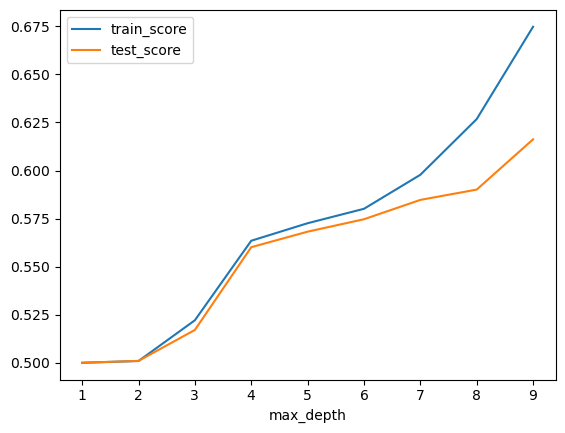

In [52]:
models_df.plot(x='max_depth')

In [53]:
# it looks like the lines start to diverge a lot after 7
# Create and train a RandomForest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 7, n_estimators=100)
model.fit(X_train_encoded, y_train_encoded)

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.6037917921147279
0.5887168226665977
